# Project 2 - Footwear & Apparel analysis

## 1.1 Problems:
Apparels brands face intense competition with paramount number of rivals in the markets, leaving the customers with numerous of cf choice and making them reluctant to select their favourite items. Understanding customer-inside is one of the core requirement if any brands deisre to hold the customers'loyalty and satisfaction, print the brand's image in customers' perspection, and maximize the company's profit. Analyzing customers's behavior is the pivotal aspect in marketing strategy that not only help marketers make the approriate plan but also prevent from wasting redundancy fees in production.In this project, we delve deep into the thriving sector of shoe retail by analyzing the customer survey. The customer's reference, favourite, complanation will be explained meticulously in this notebook, we also focus on customer segmentation to uncover the group similarlity attributes of each group to robust the marketing strategies effectively and productively.



## 1.2 Objectives:
#### + Data cleaning & transformation:
Cleanning the dataset by dropping unneccessary columns, transforms binary data types to categorical datatype.
#### + Data Preprocessing:
Undertaking standarscaler to set up all data to the certain range
#### + Customer Segmentation using K-Means clustering:
Segment customers into using K-means and K-mode, facilitating tageted marketing and personalized strategies
#### + Cluster anlysis and evaluation:
Analyze and profile each cluster to develop targeted marketing strateries


Team Members:

Vy Nguyen

Thao Quach

### 2.1 Importing Necessary Libraries

In [617]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [618]:
from google.colab import files

data = files.upload()

Saving survey_data.xlsx to survey_data (4).xlsx


In [619]:
df = pd.read_excel('survey_data.xlsx')
df.head(5)


,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   record  175 non-null    int64
 1   id      175 non-null    int64
 2   S1r1    175 non-null    int64
 3   S1r2    175 non-null    int64
 4   S1r3    175 non-null    int64
 5   S2r1    175 non-null    int64
 6   S2r2    175 non-null    int64
 7   S3r1    175 non-null    int64
 8   S3r2    175 non-null    int64
 9   S4r1    175 non-null    int64
 10  S4r2    175 non-null    int64
 11  S4r3    175 non-null    int64
 12  S4r4    175 non-null    int64
 13  S4r5    175 non-null    int64
 14  S4r6    175 non-null    int64
 15  Q1r1    175 non-null    int64
 16  Q1r2    175 non-null    int64
 17  Q1r3    175 non-null    int64
 18  Q2r1    175 non-null    int64
 19  Q2r2    175 non-null    int64
 20  Q2r3    175 non-null    int64
 21  Q2r4    175 non-null    int64
 22  Q3r1    175 non-null    int64
 23  Q3r2    175 non

## Inference
The dataset consists of 175 entries and 47 columns.
The dataset will contain survey data comming from participancts surveyed who answered various questions regarding the running habits

record: Dataset record number

id: Unique identifier for survey participant.

gender: Participant gender.

age: Participant age.

From S1r1 to S1r3 describes how regularly customers go for a run

S2r1, S2r2 asked customers how many pairs of running shoes they owned at a time when they train?

S3r1, S3r2 investigated the customers' gender

From S4r1 to S4r6 investigated the customers'age  

From Q1r1 to Q1r3 show the types of cushioning the shoes that customers trained in most regularly use

From Q2r2 to Q2r4 showed the type of plating of the shoes that customers race in use

From Q3r1 to Q3r4 indicated the physical activities customers do outside of running

From Q4r1 to Q4r2 demonstrated the top activities about the shoe customers use to run in most regularly

From Q5r1 to Q5r2 investigated the common activities customers do once they use shoes

From Q6r1 to Q6r5 described the top complaint about the shoes

From Q7r1 to Q7r5 filed the common customers favourite color

## 2.2 Data Cleanning and Data Preparation




In [621]:
# Because S2r2, S2r1 investigated the verification of the data, we eleminated the row that have S2r2 equal 1 , we also removed S2r1 and S2r2
df = df.drop(df[df['S2r2']==1].index)

In [622]:
df.shape

(149, 47)

### 2.2.1 Handling country column

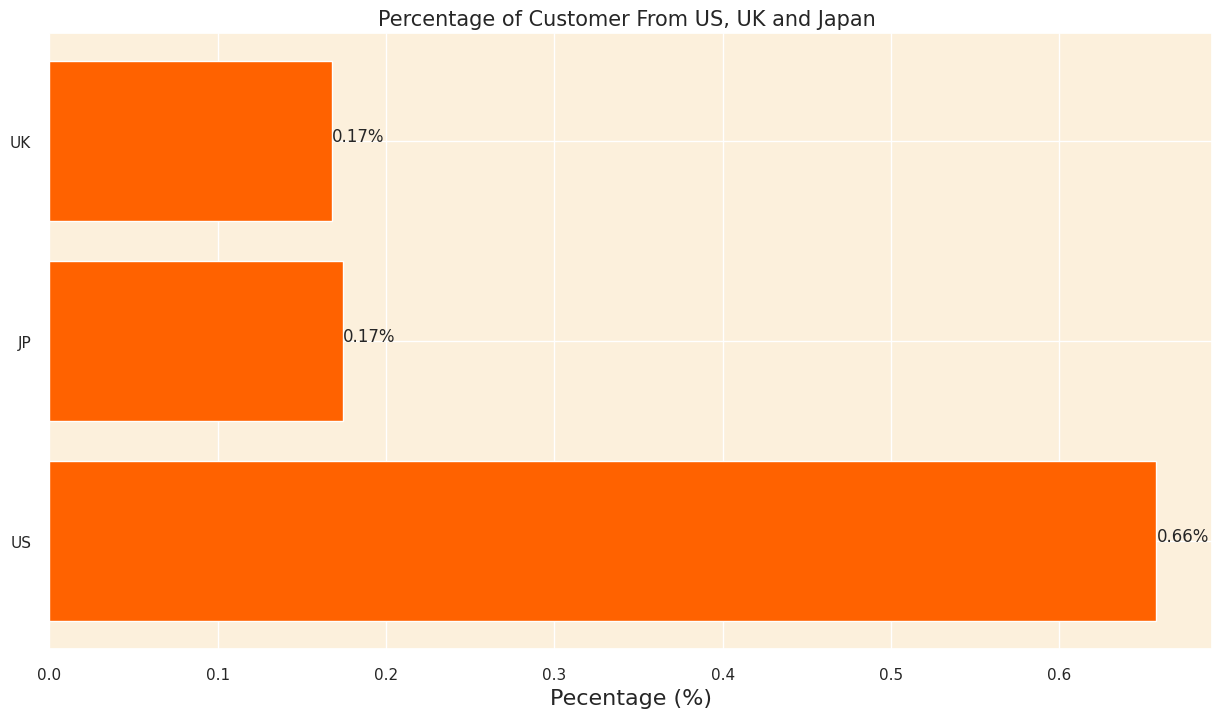

In [623]:
df_country = df[['S1r1', 'S1r2', 'S1r3']]
df_country['country'] = df_country.apply(lambda x: 'US' if x['S1r1'] == 1 else 'UK' if x['S1r2'] == 1 else 'JP' if x['S1r3'] == 1 else np.nan, axis = 1)
fig, ax = plt.subplots(figsize = (15,8))
country_plot = df_country['country'].value_counts(normalize= True)
#sns.countplot(x = 'country, data = country_plot, color = '#ff6200')
ax.barh(country_plot.index, country_plot, color = '#ff6200')
for i, value in zip(country_plot.index, country_plot):
  ax.text(value , i, f"{value:.2f}%")

plt.title("Percentage of Customer From US, UK and Japan ", fontsize = 15)
plt.xlabel('Pecentage (%)', fontsize = 16)
plt.show()

 More than 65% customer who did the survered from US, hence we decided to remove the country column to prevent potential collision.
 We also eleminate record, id, S2r1, S2r2 columns that is not neccessary for analyze

In [624]:
df = df.drop(['record', 'id', 'S2r1', 'S2r2', 'S1r1', 'S1r2', 'S1r3'],axis = 1)

### 2.2.2 Wrandling gender column

In [625]:
df_gender = df[['S3r1', 'S3r2']]

In [626]:
df_gender['gender'] = df_gender.apply(lambda x: 'M' if x['S3r1'] == 1 else 'F' if x['S3r2']==1 else np.nan, axis = 1)
df_gender['gender'].head(5)

0    M
1    M
2    F
3    F
4    F
Name: gender, dtype: object

In [627]:
df_age = df[['S4r1', 'S4r2', 'S4r3', 'S4r4', 'S4r5', 'S4r6']]
df_age['age'] = df_age.apply(lambda x: 'under 18' if x['S4r1']== 1 else '18-24' if x['S4r2'] == 1 else '25-34' if x['S4r3'] == 1 else '35-44' if x['S4r4'] == 1 else '45-54' if x['S4r5'] == 1 else 'above 55' if x['S4r6'] == 1 else np.nan, axis = 1)
df_age['age'].head()

0       45-54
1       35-44
2       18-24
3       35-44
4    under 18
Name: age, dtype: object

In [628]:
df_total = pd.concat([df_gender['gender'], df_age['age']], axis = 1)
df_total.head(5)

,gender,age
0,M,45-54
1,M,35-44
2,F,18-24
3,F,35-44
4,F,under 18


### 2.2.3 Wrandling regular column

In [629]:
df_regular = df[['Q1r1', 'Q1r2', 'Q1r3']]
df_regular['regular'] = df_regular.apply(lambda x: 'Occasion' if x['Q1r1'] == 1 else 'Fairly' if x['Q1r2'] == 1 else 'Generally' if x['Q1r3'] == 1 else np.nan, axis = 1)
df_regular['regular'].head(5)

0       Fairly
1       Fairly
2    Generally
3       Fairly
4     Occasion
Name: regular, dtype: object

In [630]:
df_total = pd.concat([df_total, df_regular['regular']], axis = 1)
df_total.head(5)

,gender,age,regular
0,M,45-54,Fairly
1,M,35-44,Fairly
2,F,18-24,Generally
3,F,35-44,Fairly
4,F,under 18,Occasion


### 2.2.4 Wrandling shoe column

In [631]:
df_pair = df[['Q2r1', 'Q2r2', 'Q2r3','Q2r4']]
df_pair['shoe_num'] = df_pair.apply(lambda x:
                                    'single' if x['Q2r1'] == 1 else
                                    '1 pair' if x['Q2r2'] == 1 else
                                    '3+pair' if x['Q2r3'] == 1 else
                                    '5+pair' if x['Q2r4'] == 1 else
                                    np.nan, axis=1)
df_pair['shoe_num'].head(5)

0    1 pair
1    1 pair
2    3+pair
3    1 pair
4    single
Name: shoe_num, dtype: object

In [632]:
df_total = pd.concat([df_total, df_pair['shoe_num']], axis = 1)
df_total.head(5)

,gender,age,regular,shoe_num
0,M,45-54,Fairly,1 pair
1,M,35-44,Fairly,1 pair
2,F,18-24,Generally,3+pair
3,F,35-44,Fairly,1 pair
4,F,under 18,Occasion,single


In [633]:
df_cushioning = df[['Q3r1', 'Q3r2', 'Q3r3', 'Q3r4']]
df_cushioning['cushioning'] = df_cushioning.apply(lambda x:
                                                  'not sure' if x['Q3r1'] ==1 else
                                                   'foam' if x['Q3r2'] == 1 else
                                                  'rubber' if x['Q3r3'] ==1 else
                                                  'blend' if x['Q3r4'] == 1 else
                                                  np.nan, axis = 1
                                                  )
df_cushioning['cushioning'].head(5)

0        foam
1      rubber
2      rubber
3      rubber
4    not sure
Name: cushioning, dtype: object

In [634]:
df_total = pd.concat([df_total, df_cushioning['cushioning']], axis = 1)
df_total.head(5)

,gender,age,regular,shoe_num,cushioning
0,M,45-54,Fairly,1 pair,foam
1,M,35-44,Fairly,1 pair,rubber
2,F,18-24,Generally,3+pair,rubber
3,F,35-44,Fairly,1 pair,rubber
4,F,under 18,Occasion,single,not sure


### 2.2.5 Wrandling plating column

In [635]:
df_plating = df[['Q4r1', 'Q4r2', 'Q4r3', 'Q4r4', 'Q4r5']]
df_plating['plating'] = df_plating.apply(lambda x:
                                         'no_run' if x['Q4r1'] == 1 else
                                         'diff_shoe' if x['Q4r2'] == 1 else
                                         'rubber_plate' if x['Q4r3'] == 1 else
                                         'foam_plate' if x['Q4r4'] == 1 else
                                         'carbon_plate' if x['Q4r5'] == 1 else
                                         np.nan, axis=1)

df_plating['plating'].head(5)

0          no_run
1    rubber_plate
2    rubber_plate
3       diff_shoe
4       diff_shoe
Name: plating, dtype: object

In [636]:
df_total = pd.concat([df_total, df_plating['plating']], axis = 1)
df_total.head(5)

,gender,age,regular,shoe_num,cushioning,plating
0,M,45-54,Fairly,1 pair,foam,no_run
1,M,35-44,Fairly,1 pair,rubber,rubber_plate
2,F,18-24,Generally,3+pair,rubber,rubber_plate
3,F,35-44,Fairly,1 pair,rubber,diff_shoe
4,F,under 18,Occasion,single,not sure,diff_shoe


### 2.2.6 Wrangling activity column

In [637]:
df_activity = df[['Q5r1', 'Q5r2', 'Q5r3','Q5r4','Q5r5', 'Q5r6']]
df_activity['activity'] = df_activity.apply(lambda x:
                                            'yoga' if x['Q5r1'] == 1 else
                                            'nothing' if x['Q5r2'] == 1 else
                                            'spining' if x['Q5r3'] == 1 else
                                            'lifting' if x['Q5r4'] == 1 else
                                            'swimming'if x['Q5r5'] == 1 else
                                            'hiking' if x['Q5r6'] == 1 else
                                            np.nan, axis = 1)

df_activity['activity'].head(5)

0    nothing
1    lifting
2    lifting
3       yoga
4       yoga
Name: activity, dtype: object

In [638]:
df_total = pd.concat([df_activity['activity'], df_total], axis = 1)
df_total.head(5)

,activity,gender,age,regular,shoe_num,cushioning,plating
0,nothing,M,45-54,Fairly,1 pair,foam,no_run
1,lifting,M,35-44,Fairly,1 pair,rubber,rubber_plate
2,lifting,F,18-24,Generally,3+pair,rubber,rubber_plate
3,yoga,F,35-44,Fairly,1 pair,rubber,diff_shoe
4,yoga,F,under 18,Occasion,single,not sure,diff_shoe


### 2.2.7 Wrangling complaint column

In [639]:
df_complaint = df[['Q6r1','Q6r2','Q6r3','Q6r4','Q6r5']]
df_complaint['complaint'] = df_complaint.apply(lambda x:
                                               'no complaint'if x['Q6r1'] == 1 else
                                               'too fast' if x['Q6r2'] == 1 else
                                              'too narrow' if x['Q6r3'] == 1 else
                                               'too heavy' if x['Q6r4'] == 1 else
                                               'not fashionable' if x['Q6r5'] == 1 else
                                               np.nan, axis =1
                                               )
df_total = pd.concat([df_complaint['complaint'], df_total], axis = 1)
df_total.head(5)

,complaint,activity,gender,age,regular,shoe_num,cushioning,plating
0,too fast,nothing,M,45-54,Fairly,1 pair,foam,no_run
1,too fast,lifting,M,35-44,Fairly,1 pair,rubber,rubber_plate
2,not fashionable,lifting,F,18-24,Generally,3+pair,rubber,rubber_plate
3,not fashionable,yoga,F,35-44,Fairly,1 pair,rubber,diff_shoe
4,not fashionable,yoga,F,under 18,Occasion,single,not sure,diff_shoe


In [640]:
pd.set_option('display.max_rows', None)


### Wrangling color column

In [641]:
df_color = df[['Q7r1', 'Q7r2', 'Q7r3', 'Q7r4', 'Q7r5']]
df_color['color'] = df_color.apply(lambda x:
                                   'bright bold' if x['Q7r1'] == 1 else
                                   'soft pastel' if x['Q7r2'] == 1 else
                                   'earth tones' if x['Q7r3'] == 1 else
                                   'neutrals' if x['Q7r4'] == 1 else
                                   'normal' if x['Q7r5'] == 1 else
                                   np.nan, axis = 1)
df_color['color'].head(5)

0    earth tones
1    earth tones
2    soft pastel
3    soft pastel
4    bright bold
Name: color, dtype: object

In [642]:
df_total = pd.concat([df_color['color'], df_total], axis=1)
df_total.head(5)

,color,complaint,activity,gender,age,regular,shoe_num,cushioning,plating
0,earth tones,too fast,nothing,M,45-54,Fairly,1 pair,foam,no_run
1,earth tones,too fast,lifting,M,35-44,Fairly,1 pair,rubber,rubber_plate
2,soft pastel,not fashionable,lifting,F,18-24,Generally,3+pair,rubber,rubber_plate
3,soft pastel,not fashionable,yoga,F,35-44,Fairly,1 pair,rubber,diff_shoe
4,bright bold,not fashionable,yoga,F,under 18,Occasion,single,not sure,diff_shoe


The data set after changing from binary data to categorical data, including the 9 main attributes used to predict customer segmentation

### 3 Exploratory Data Analysis

#### 3.1 Summary Statistics

In [643]:
df_total.shape

(149, 9)

In [644]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 174
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       136 non-null    object
 1   complaint   149 non-null    object
 2   activity    148 non-null    object
 3   gender      149 non-null    object
 4   age         149 non-null    object
 5   regular     149 non-null    object
 6   shoe_num    149 non-null    object
 7   cushioning  149 non-null    object
 8   plating     148 non-null    object
dtypes: object(9)
memory usage: 11.6+ KB


### Observation
+ 9 columns contain 149 recording rows and otherwise lacks some of rows.
+ Some of columns have 149 non-null values, there are no missing values.
+ All columns are categorical data
+ However, some columns have missing value such as color, plating, and activity. We need to execute the cleaning data

In [645]:
df_total.describe().T

,count,unique,top,freq
color,136,5,earth tones,31
complaint,149,5,not fashionable,82
activity,148,5,yoga,60
gender,149,2,F,76
age,149,6,35-44,38
regular,149,3,Fairly,53
shoe_num,149,4,1 pair,51
cushioning,149,4,rubber,67
plating,148,5,no_run,52


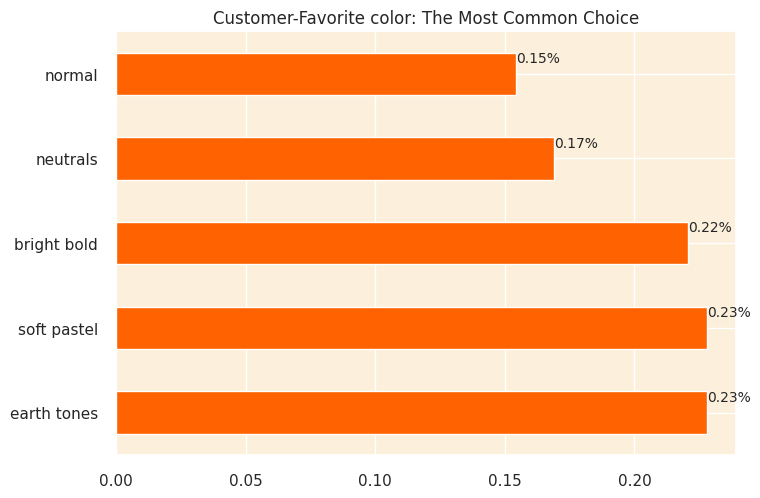

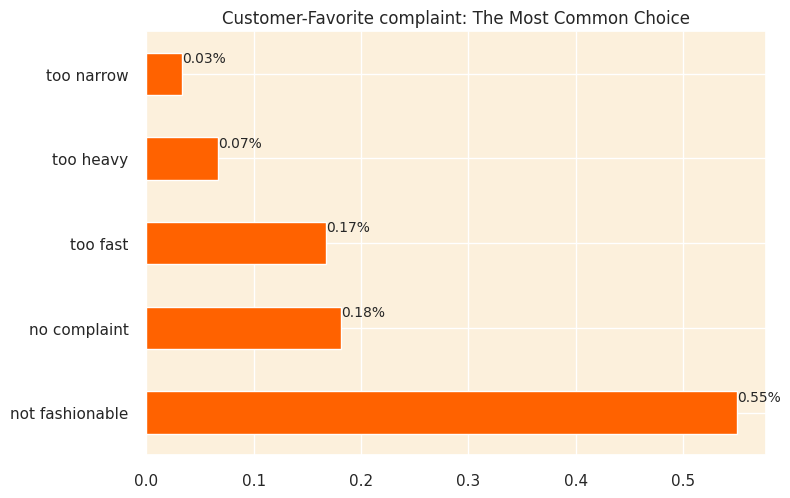

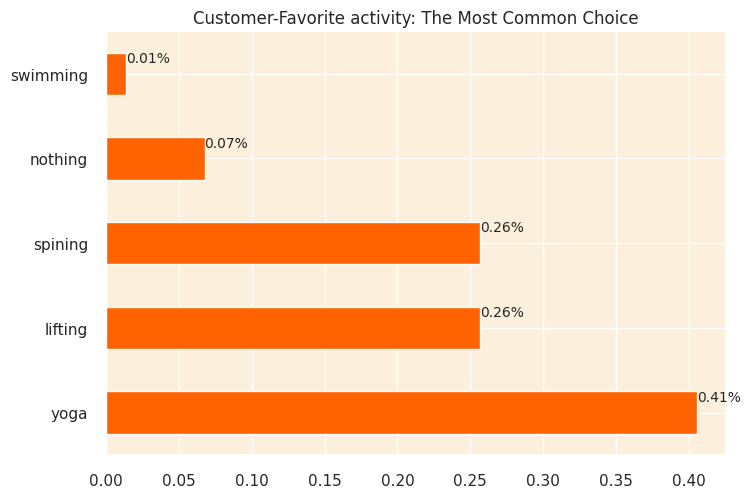

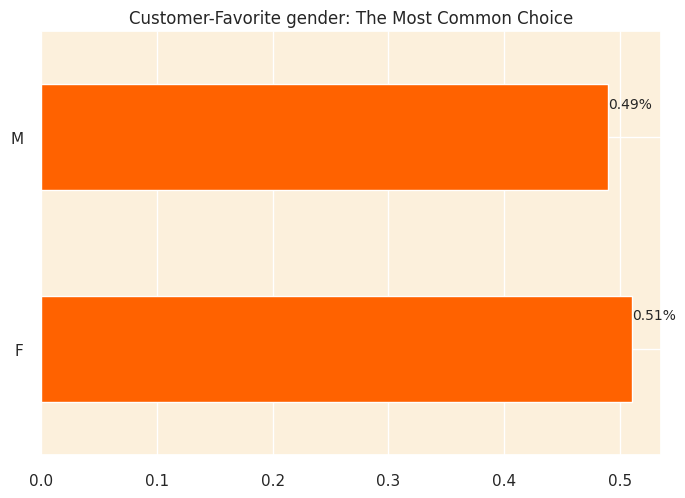

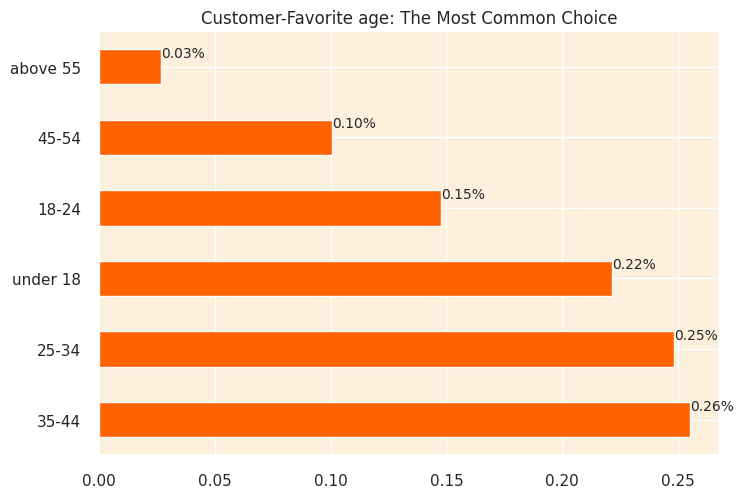

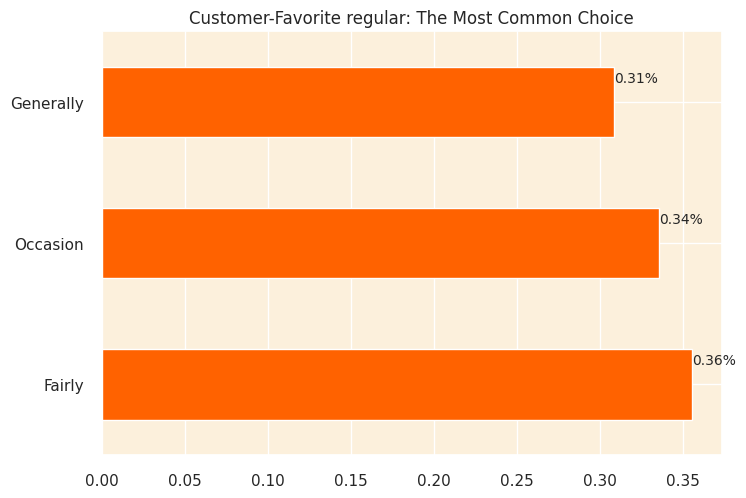

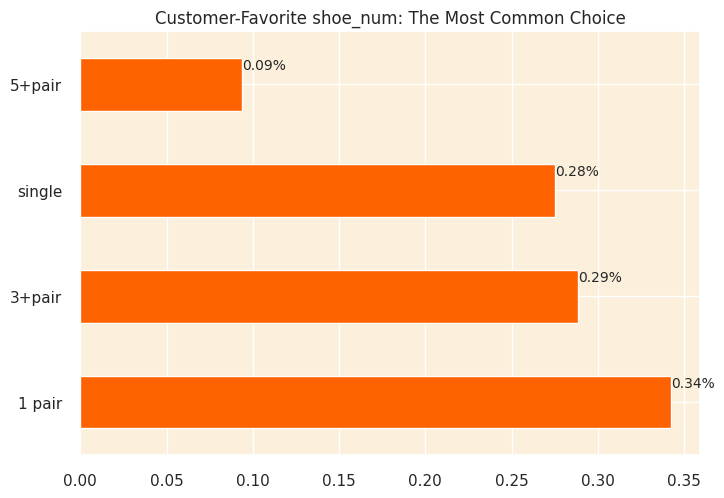

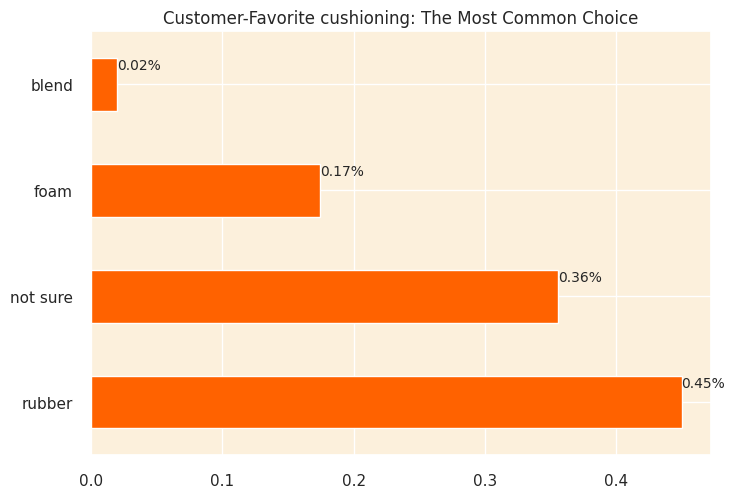

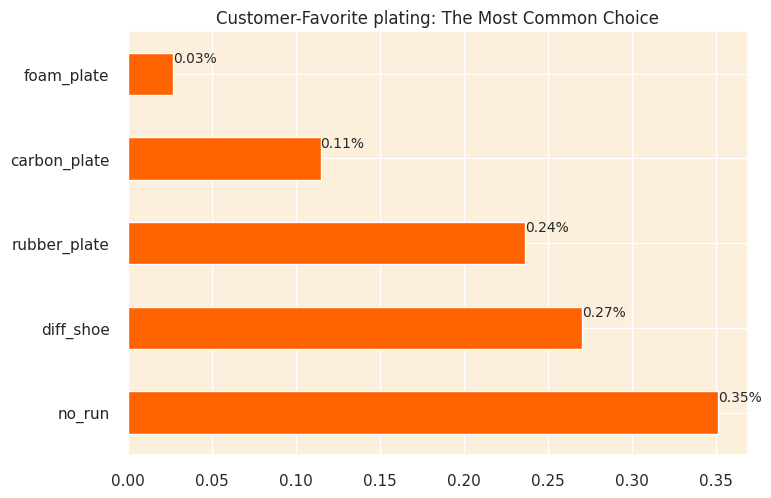

In [646]:
df_total_list = df_total.columns.to_list()

for i in df_total_list:
    col = df_total[i].value_counts(normalize=True)
    col.plot(kind = 'barh', color='#ff6200')
    for index, value in enumerate(col):
      plt.text(value, index + 0.14, f'{value:.2f}%', fontsize = 10)
    plt.title(f'Customer-Favorite {i}: The Most Common Choice')
    plt.show()


### Observations:
+ The majority of customers show preference for earth tones over other colors, soft pastel, and bright bold
+ The notable number of customer complained that the shoes looked unfashionable
+ There are 41% of customer using shoes for yoga, whereas 26 % of customers used for for lifting or spining.
+ The main customers' age spans up to 44 years old
+ Most of customers own at least one pair of shoe,except some small pecentage of customers have more than 5 pairs
+ There are 45% of customer favor wearing rubber cushioning, while others express unceartanly cushioning preference or prefer foam or blend cushioning
+ The percentage of customers who infrequently run, have different shoes or rubber plate shoe stand at 35%, 28%, 23% respectively

### 3.2 Cleaning the missing data

In [669]:
df_total['plating'].fillna('diff_shoe', inplace= True)

 _ Filling the null value in plating column by "diff_shoe" because it takes large amount of total selections

In [670]:
df_total['activity'].fillna('yoga', inplace = True)

_Filling the null value in activity column by "yoga" because it stands for the most common option

In [671]:
df_total['color'].fillna('other', inplace = True)
df_total['color'].value_counts()

earth tones    31
soft pastel    31
bright bold    30
neutrals       23
normal         21
other          13
Name: color, dtype: int64

_ Because the number of missing values is relatively higher among other options, we created the new row's name for it

### 3.3 Feature engineering

In [649]:
df_total['complaint'][df_total['complaint'] == 'too fast'] = 'complaint'
df_total['complaint'][df_total['complaint'] == 'too heavy'] = 'complaint'
df_total['complaint'][df_total['complaint'] == 'too narrow'] = 'complaint'
df_total['complaint'].value_counts()

not fashionable    82
complaint          40
no complaint       27
Name: complaint, dtype: int64

_ Due to the smaller percentages associated with certain complaint options like 'too fast,' 'too heavy,' and 'too narrow,' we've opted to combine these into a single group

In [650]:
df_total['activity'][df_total['activity'] == 'hiking'] = 'others'
df_total['activity'][df_total['activity'] == 'swimming'] = 'others'
df_total['activity'][df_total['activity'] == 'nothing'] = 'others'
df_total['activity'].value_counts()

yoga       60
lifting    38
spining    38
others     12
Name: activity, dtype: int64

_Because of the minority percentage associate with activities like 'hiking', 'swimmming', 'nothing', we decided to merge all to the same group as 'others'

In [651]:
df_total['age'][df_total['age'] == '45-54'] = 'above 45'
df_total['age'][df_total['age'] == 'above 55'] = 'above 45'
df_total['age'].value_counts()

35-44       38
25-34       37
under 18    33
18-24       22
above 45    19
Name: age, dtype: int64

_Similarly, we combine the customers who aged from 45-54 and above 55 years old to the same group

In [652]:
df_total['plating'][df_total['plating'] == 'foam_plate'] = 'other'
df_total['plating'][df_total['plating'] == 'carbon_plate'] = 'other'
df_total['plating'].value_counts()

no_run          52
diff_shoe       41
rubber_plate    35
other           21
Name: plating, dtype: int64

### 3.4/ Checking the relationship between the attribute with gender

gender        F   M  All
color                   
soft pastel  31   0   31
bright bold  20  10   30
other         0  13   13
neutrals      8  15   23
earth tones  14  17   31
normal        3  18   21
All          76  73  149
------------------------------------------------------------------------------------------------------------------------


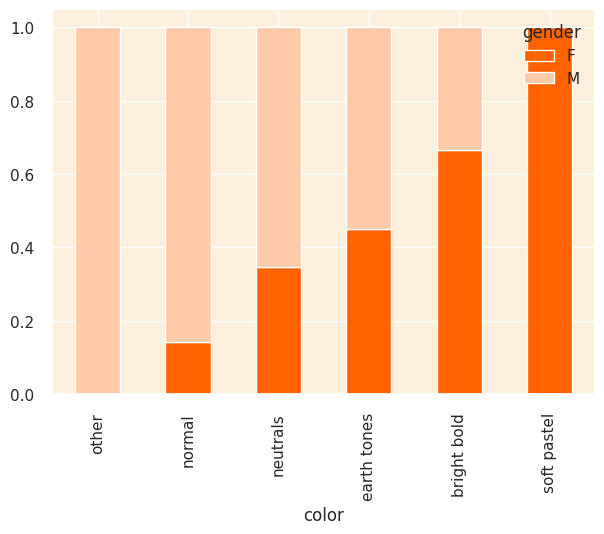

gender            F   M  All
complaint                   
no complaint      8  19   27
not fashionable  56  26   82
complaint        12  28   40
All              76  73  149
------------------------------------------------------------------------------------------------------------------------


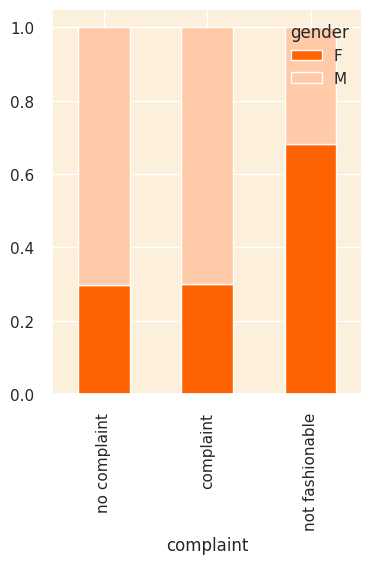

gender     F   M  All
activity             
others     6   6   12
lifting   21  17   38
yoga      39  21   60
spining   10  28   38
All       76  72  148
------------------------------------------------------------------------------------------------------------------------


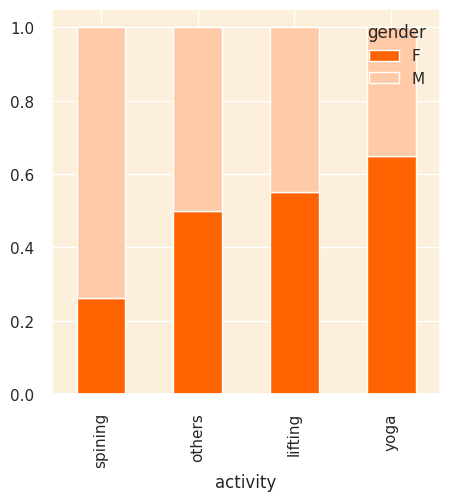

gender     F   M  All
age                  
18-24      9  13   22
25-34     24  13   37
above 45   4  15   19
under 18  18  15   33
35-44     21  17   38
All       76  73  149
------------------------------------------------------------------------------------------------------------------------


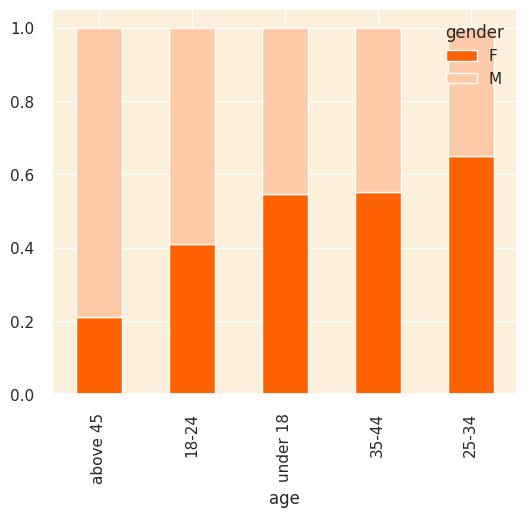

gender      F   M  All
regular               
Generally  23  23   46
Fairly     29  24   53
Occasion   24  26   50
All        76  73  149
------------------------------------------------------------------------------------------------------------------------


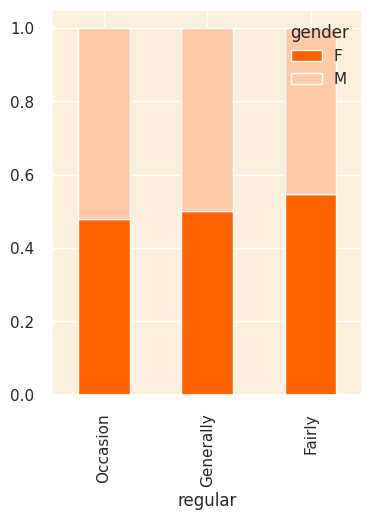

gender     F   M  All
shoe_num             
5+pair     3  11   14
single    24  17   41
3+pair    25  18   43
1 pair    24  27   51
All       76  73  149
------------------------------------------------------------------------------------------------------------------------


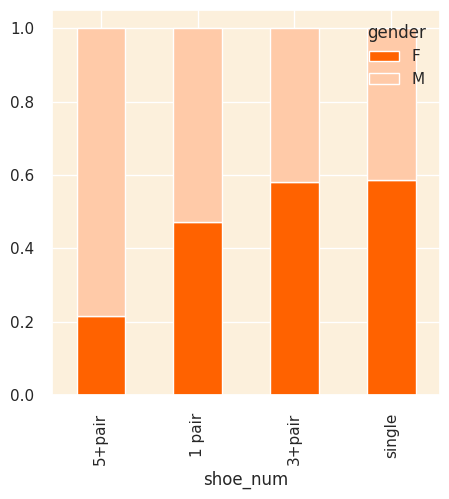

gender       F   M  All
cushioning             
blend        3   0    3
foam         7  19   26
rubber      41  26   67
not sure    25  28   53
All         76  73  149
------------------------------------------------------------------------------------------------------------------------


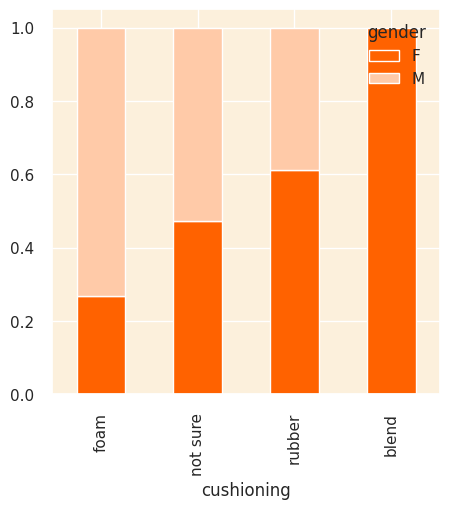

gender         F   M  All
plating                  
rubber_plate  21  14   35
other          6  15   21
diff_shoe     24  17   41
no_run        25  27   52
All           76  73  149
------------------------------------------------------------------------------------------------------------------------


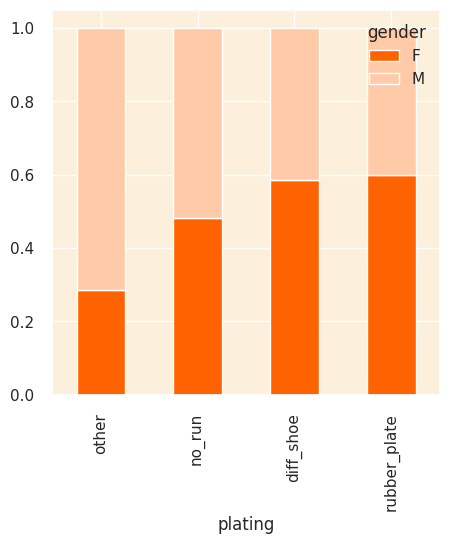

In [653]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#ff6200', '#ffcaa8']
# Function to create a stacked bar plot
def stacked_barplot(data, target, predictor):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count + 1, 5), color = colors )
    plt.show()

# Assuming this is the list of columns you want to analyze
columns = ['color', 'complaint', 'activity', 'age', 'regular', 'shoe_num', 'cushioning', 'plating']

# Loop through columns and create stacked bar plots for each column
for i in columns:
  stacked_barplot(df_total, 'gender', i)


## Observations
+ Most women show a strong preference for soft pastel shades, followed by bright bold and earth tones. They tend to avoid normal colors and others. Men, on the other hand, lean towards other colors, normal shades, and neutrals, with less inclination towards soft pastel and bright bold hues.
+ A significant number of male customers express dissatisfaction with the fashionable aspect of the shoes. Conversely, other customers either have no complaints or present miscellaneous issues.
+ Women typically opt for shoes for yoga, while men tend to favor them for spinning activities.
+ Notably, men aged above 45 exhibit a higher inclination towards using shoes compared to women in the same age group. Other customers within the same age range display similar behavior.
Every female customer prefers shoes with blend cushioning, while male customers exhibit a preference for foam cushioning.

### 4. Similartity Metric and Matrix

Because the dataset contained the binary data, the Jaccard index calculates the similarity based on counting on common non-zero elements divided by the count of total non-zero elements in both sets

In [654]:
from sklearn.metrics import jaccard_score
similarity_matrix = pd.DataFrame(index = df.index, columns = df.index)
for i in df.index:
  for j in df.index:
    similarity_matrix.loc[i,j] = jaccard_score(df.loc[i], df.loc[j])

In [655]:
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,168,169,170,171,172,173,174
0,1.0,0.333333,0.047619,0.111111,0.0,0.05,0.111111,0.176471,0.105263,0.294118,...,0.166667,0.538462,0.0,0.157895,0.176471,0.052632,0.052632,0.047619,0.052632,0.0
1,0.333333,1.0,0.25,0.285714,0.0,0.1875,0.2,0.2,0.117647,0.176471,...,0.117647,0.5,0.117647,0.176471,0.285714,0.285714,0.285714,0.111111,0.285714,0.176471
2,0.047619,0.25,1.0,0.25,0.111111,0.3125,0.176471,0.176471,0.105263,0.157895,...,0.105263,0.052632,0.4,0.222222,0.25,0.666667,0.666667,0.375,0.666667,0.692308
3,0.111111,0.285714,0.25,1.0,0.285714,0.055556,0.8,0.0,0.357143,0.176471,...,0.0,0.285714,0.117647,0.052632,0.058824,0.2,0.2,0.111111,0.2,0.25
4,0.0,0.0,0.111111,0.285714,1.0,0.0,0.384615,0.0,0.461538,0.333333,...,0.0,0.058824,0.055556,0.0,0.0,0.125,0.125,0.052632,0.125,0.111111
5,0.05,0.1875,0.3125,0.055556,0.0,1.0,0.0,0.357143,0.052632,0.05,...,0.333333,0.055556,0.538462,0.5,0.357143,0.266667,0.266667,0.5,0.1875,0.4
6,0.111111,0.2,0.176471,0.8,0.384615,0.0,1.0,0.0,0.461538,0.25,...,0.0,0.285714,0.055556,0.0,0.0,0.125,0.125,0.052632,0.125,0.176471
7,0.176471,0.2,0.176471,0.0,0.0,0.357143,0.0,1.0,0.0,0.052632,...,0.461538,0.2,0.461538,0.176471,0.2,0.285714,0.285714,0.428571,0.125,0.25
8,0.105263,0.117647,0.105263,0.357143,0.461538,0.052632,0.461538,0.0,1.0,0.5,...,0.052632,0.117647,0.052632,0.05,0.0,0.117647,0.117647,0.05,0.117647,0.166667
9,0.294118,0.176471,0.157895,0.176471,0.333333,0.05,0.25,0.052632,0.5,1.0,...,0.05,0.176471,0.0,0.047619,0.052632,0.111111,0.111111,0.0,0.176471,0.047619


In [656]:
# The set of customers have the most similar preference
for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if similarity_matrix.iloc[i, j] > 0.8:
            print(list(zip((i, j))))

[(0,), (0,)]
[(1,), (1,)]
[(2,), (2,)]
[(2,), (92,)]
[(3,), (3,)]
[(3,), (45,)]
[(3,), (116,)]
[(4,), (4,)]
[(4,), (79,)]
[(4,), (81,)]
[(4,), (138,)]
[(5,), (5,)]
[(5,), (78,)]
[(5,), (111,)]
[(6,), (6,)]
[(6,), (22,)]
[(7,), (7,)]
[(8,), (8,)]
[(8,), (95,)]
[(9,), (9,)]
[(9,), (18,)]
[(9,), (125,)]
[(10,), (10,)]
[(10,), (54,)]
[(11,), (11,)]
[(11,), (37,)]
[(11,), (111,)]
[(12,), (12,)]
[(12,), (58,)]
[(12,), (67,)]
[(12,), (98,)]
[(12,), (127,)]
[(13,), (13,)]
[(13,), (69,)]
[(13,), (80,)]
[(13,), (99,)]
[(13,), (101,)]
[(13,), (103,)]
[(14,), (14,)]
[(15,), (15,)]
[(16,), (16,)]
[(16,), (102,)]
[(16,), (120,)]
[(17,), (17,)]
[(17,), (21,)]
[(18,), (9,)]
[(18,), (18,)]
[(18,), (125,)]
[(19,), (19,)]
[(19,), (40,)]
[(20,), (20,)]
[(21,), (17,)]
[(21,), (21,)]
[(22,), (6,)]
[(22,), (22,)]
[(23,), (23,)]
[(23,), (39,)]
[(23,), (50,)]
[(24,), (24,)]
[(24,), (136,)]
[(25,), (25,)]
[(26,), (26,)]
[(27,), (27,)]
[(28,), (28,)]
[(29,), (29,)]
[(29,), (71,)]
[(30,), (30,)]
[(31,), (31,)]
[(

## 5. Clustering Algorithm

In [657]:
# Scaler the dataset to the same numeric range
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
data_scaled.head(5)

,S3r1,S3r2,S4r1,S4r2,S4r3,S4r4,S4r5,S4r6,Q1r1,Q1r2,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1.020341,-1.020341,-0.533369,-0.416207,-0.574767,-0.585100,2.988868,-0.166091,-0.710669,1.345853,...,-0.470438,2.227106,-0.204837,3.234430,-1.201092,-0.502096,-0.554092,1.679438,2.125681,-0.459763
1,1.020341,-1.020341,-0.533369,-0.416207,-0.574767,1.709109,-0.334575,-0.166091,-0.710669,1.345853,...,-0.470438,2.227106,-0.204837,-0.309173,-1.201092,-0.502096,-0.554092,1.679438,-0.470438,-0.459763
2,-0.980064,0.980064,-0.533369,2.402650,-0.574767,-0.585100,-0.334575,-0.166091,-0.710669,-0.743023,...,-0.470438,-0.449013,-0.204837,-0.309173,0.832575,-0.502096,1.804756,1.679438,-0.470438,-0.459763
3,-0.980064,0.980064,-0.533369,-0.416207,-0.574767,1.709109,-0.334575,-0.166091,-0.710669,1.345853,...,-0.470438,-0.449013,-0.204837,-0.309173,0.832575,-0.502096,1.804756,-0.595437,-0.470438,-0.459763
4,-0.980064,0.980064,1.874874,-0.416207,-0.574767,-0.585100,-0.334575,-0.166091,1.407125,-0.743023,...,-0.470438,-0.449013,-0.204837,-0.309173,0.832575,1.991649,-0.554092,-0.595437,-0.470438,-0.459763


In [658]:
data_scaled_copy = data_scaled.copy(deep = True)

###5.1/ K-mean *clustering*

Text(0, 0.5, 'SSE')

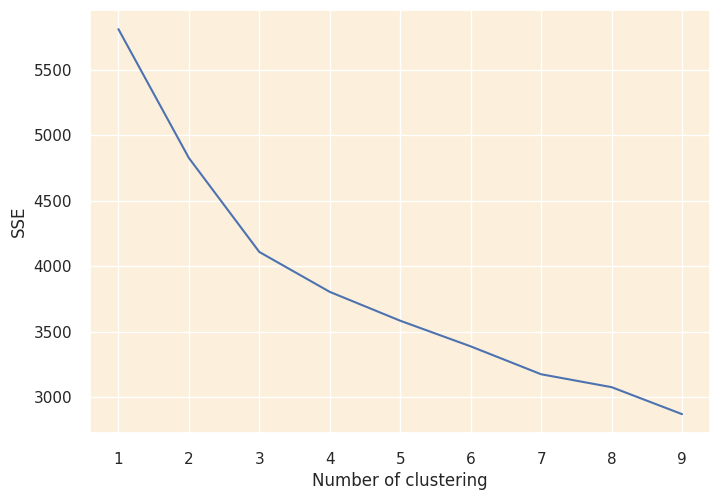

In [659]:
sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
  sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clustering')
plt.ylabel('SSE')

### Observation
we can see from the plot that there is a consistent dip from 2 to 9 and there doesn't seem to be a clear 'elbow' here. we may chose from 2 to 9 out of clusters

So, let's look at another method to get another idea to select the approritate clusters

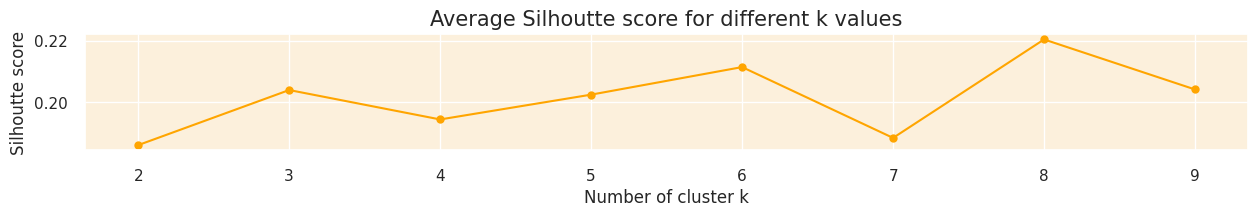

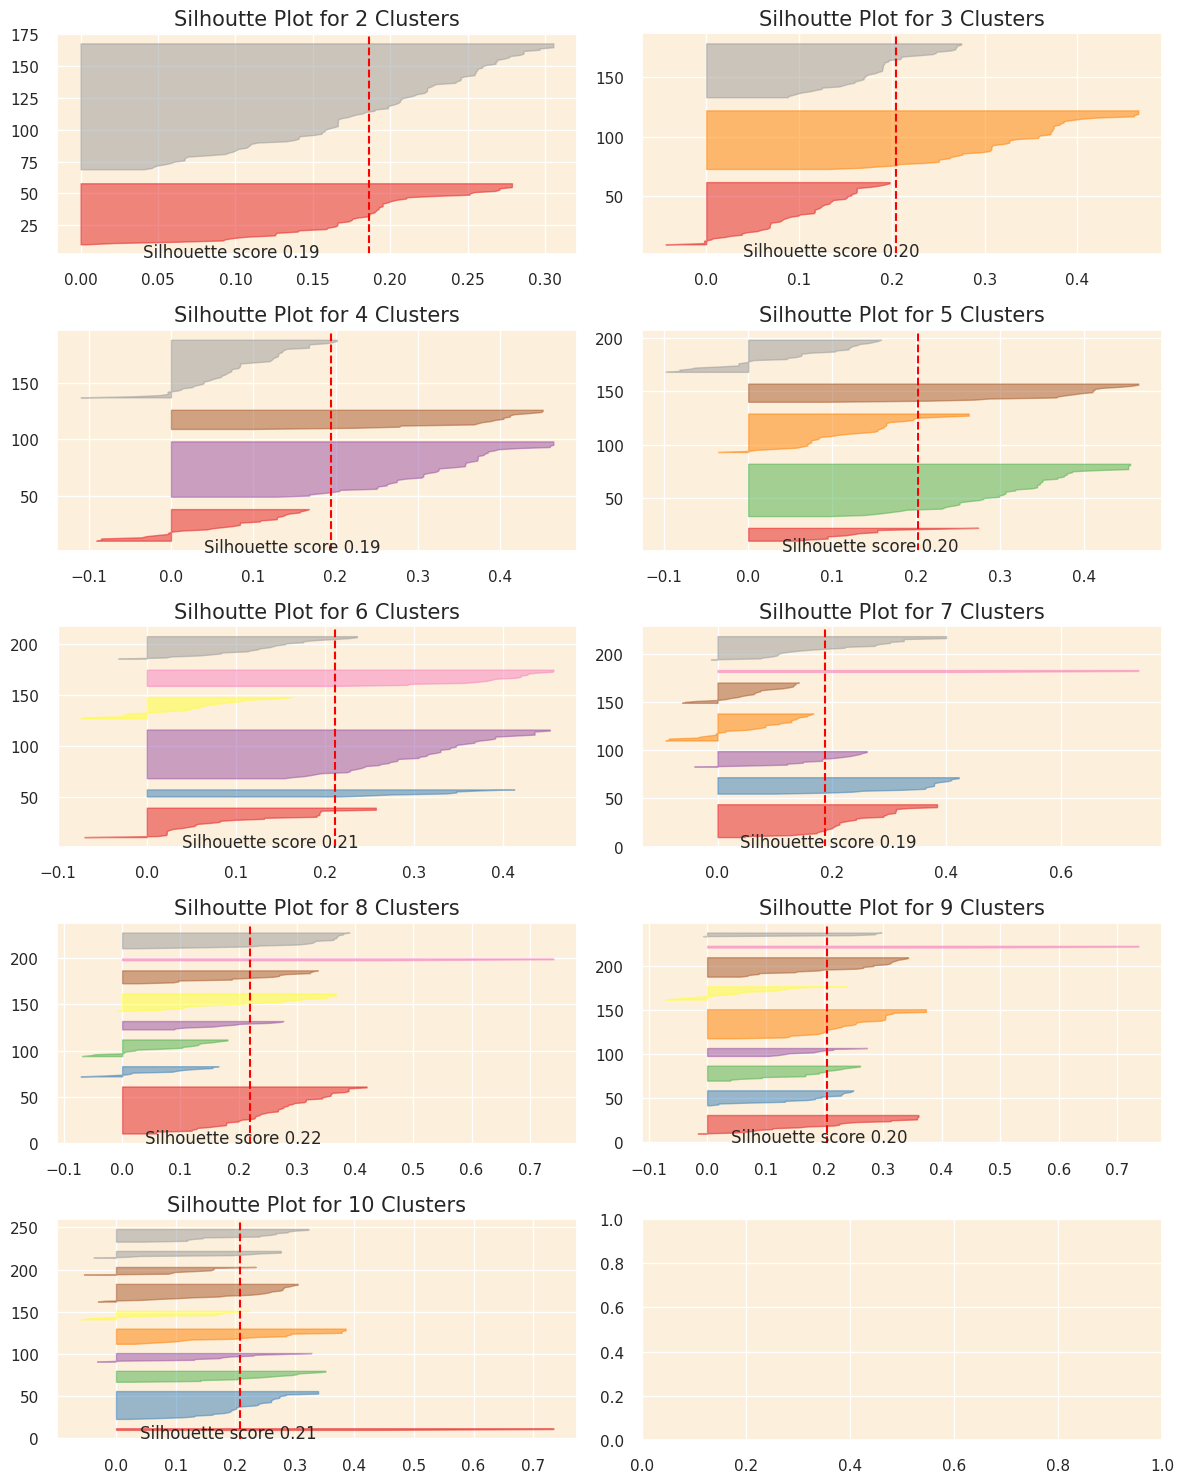

In [660]:
import matplotlib.gridspec as gridspec
from sklearn.metrics import silhouette_score


plt.figure(figsize = (15,16))

grid = gridspec.GridSpec(9, 2)

first_plot = plt.subplot(grid[0,:])

sns.set_palette(['orange'])

silhouette_scores = []

for k in range(2, 10):
  km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=1)
  km.fit(data_scaled)
  labels = km.predict(data_scaled)
  score = silhouette_score(data_scaled, labels)
  silhouette_scores.append(score)

plt.plot(range(2,10), silhouette_scores, marker = 'o')
plt.xticks(range(2,10))
plt.xlabel('Number of cluster k')
plt.ylabel('Silhoutte score')
plt.title('Average Silhoutte score for different k values', fontsize = 15)

from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig, grid = plt.subplots(5, 2, figsize=(12, 15))

for i in range(2, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=1)
    row_idx, col_idx = divmod(i - 2, 2)

    ax = grid[row_idx, col_idx]

    visualizer = SilhouetteVisualizer(km, ax=ax)
    visualizer.fit(data_scaled)

    score = silhouette_score(data_scaled, km.labels_)
    ax.text(0.04, 0.01, f'Silhouette score {score:.2f}', fontsize=12)
    ax.set_title(f'Silhoutte Plot for {i} Clusters', fontsize = 15)

plt.tight_layout()
plt.show()


Once examining the plots, it's likely that the silhouette score across each cluster is quite similar. In order to reduce dispersion between the groups, we've decided to choose for k=3.

In [661]:
kmeans = KMeans(n_clusters = 3, random_state= 0)
kmeans.fit(data_scaled)

data_scaled_copy['KMeans_labels'] = kmeans.predict(data_scaled)
df['KMeans_labels'] = kmeans.predict(data_scaled)

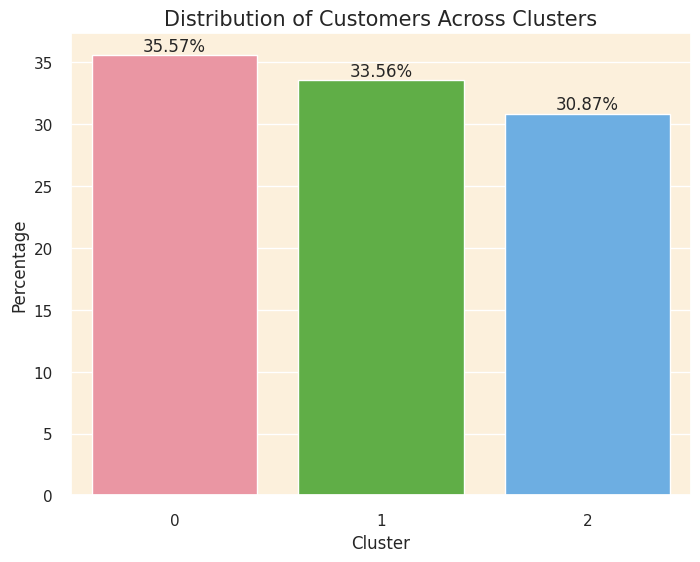

In [662]:
cluster_percentage =( data_scaled_copy['KMeans_labels'].value_counts(normalize = True)*100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by = 'Cluster', inplace = True)
# Assuming 'cluster_percentage' is a DataFrame containing cluster percentages

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Percentage', data=cluster_percentage)

# Annotate each bar with its percentage value
for index, row in cluster_percentage.iterrows():
    plt.text(row.name, row['Percentage'], f"{row['Percentage']:.2f}%", ha='center', va='bottom')

plt.title("Distribution of Customers Across Clusters", fontsize=15)
plt.xlabel("Cluster")
plt.ylabel("Percentage")
plt.show()


In [663]:
def k_mean_map(x, target, data, title):
  plt.figure(figsize=(8, 6))  # Set the size of the plot
  sns.countplot(x=x, hue=target, data=data)
  plt.title(title, fontsize = 15)
  plt.xlabel('KMeans Clusters')
  plt.ylabel('Count')
  plt.legend(title='Regular', loc='upper right')  # Adjust legend position and title
  plt.show()


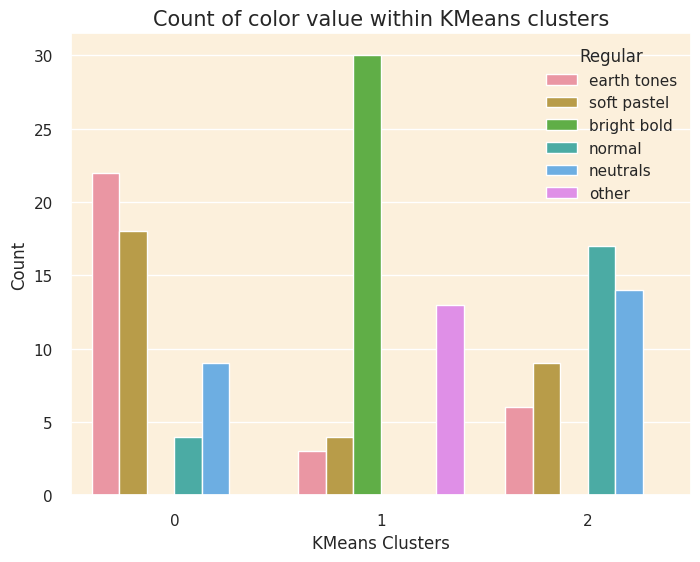

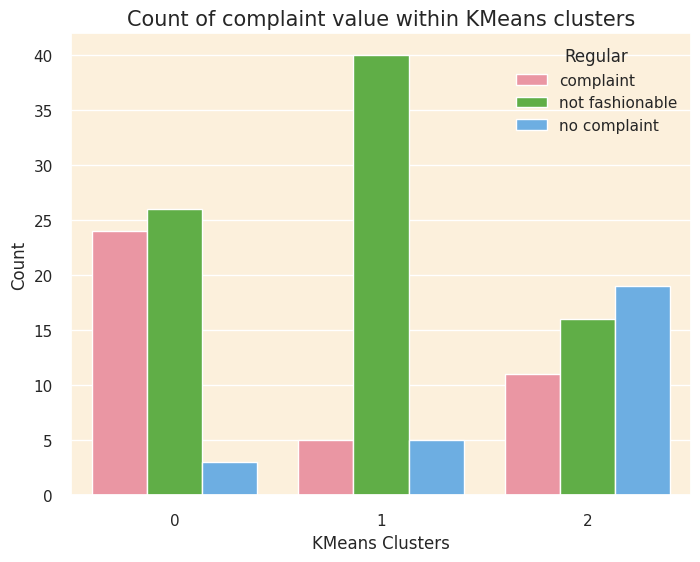

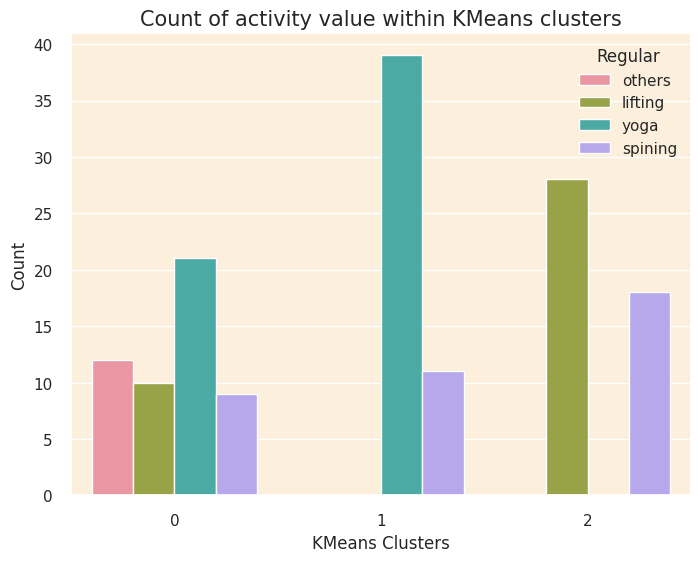

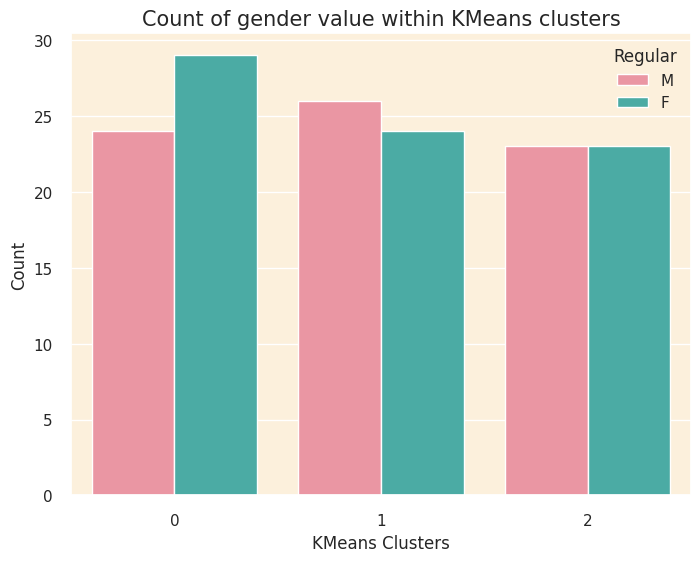

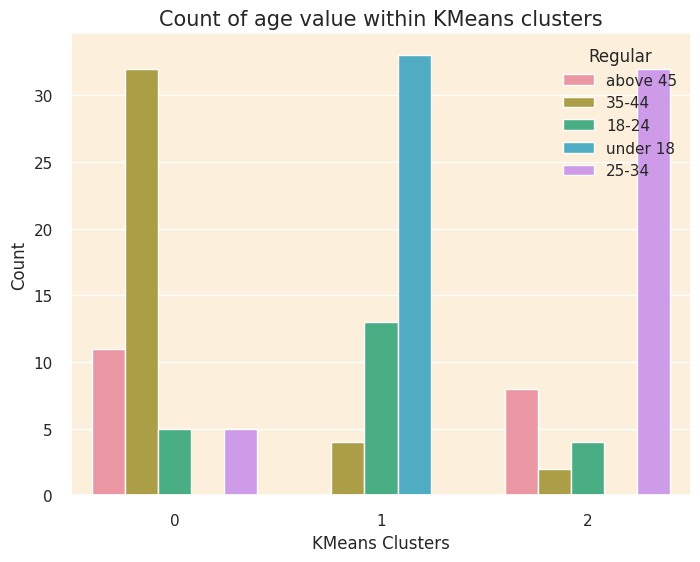

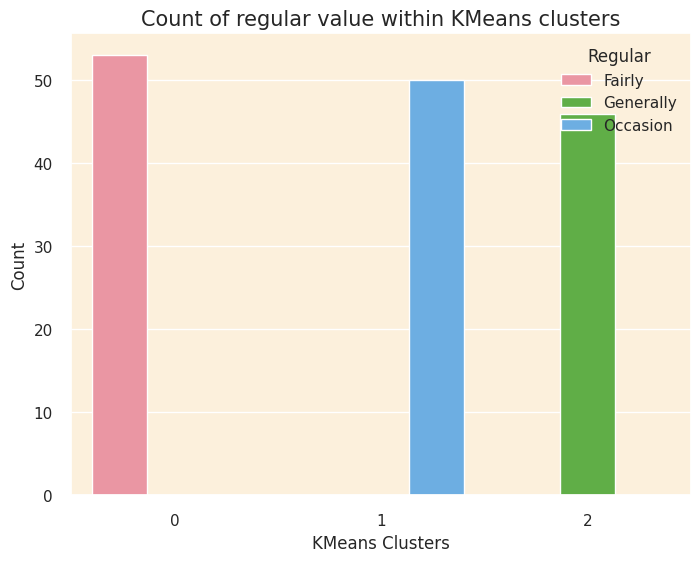

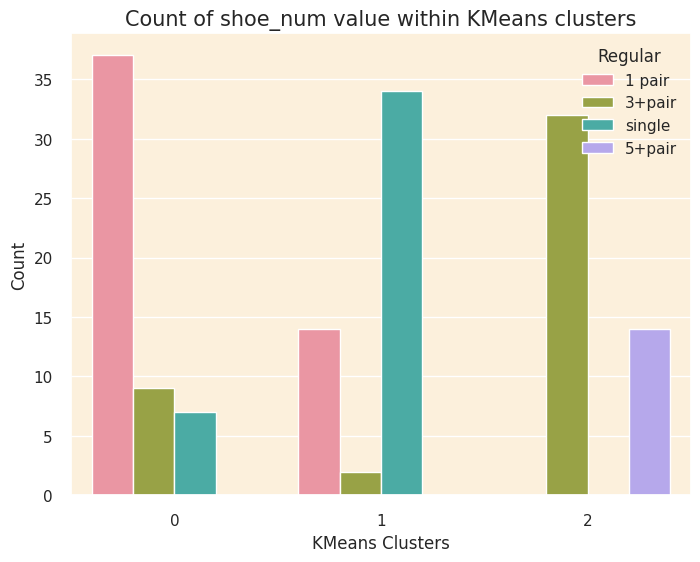

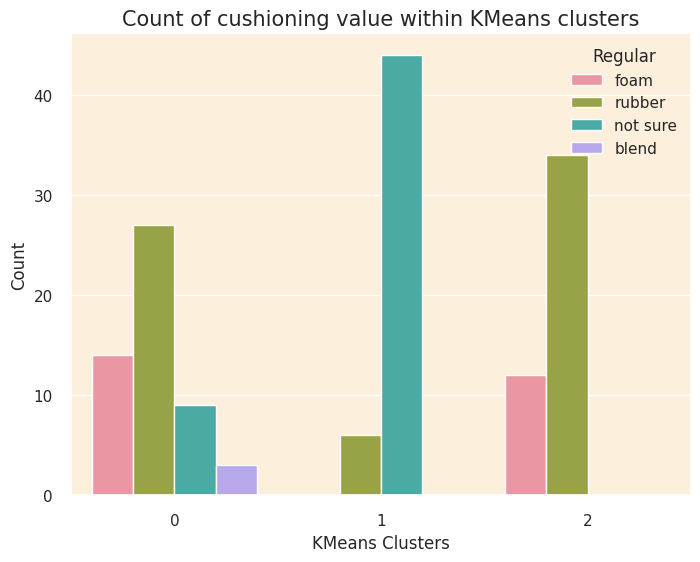

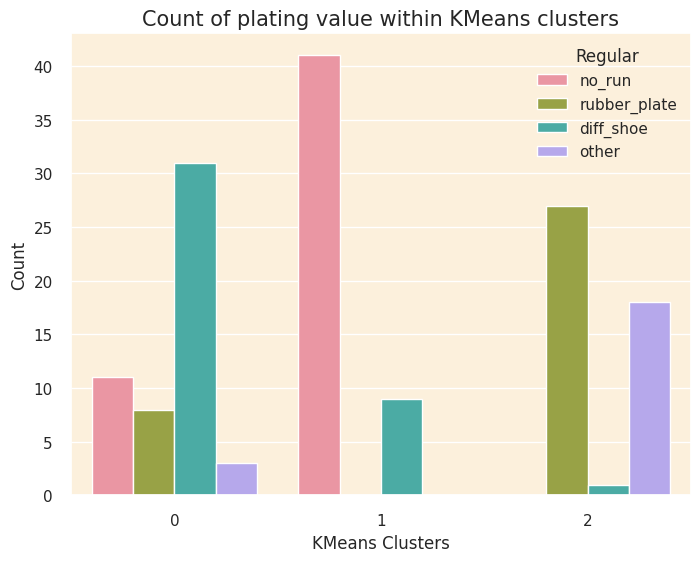

In [664]:
x = 'KMeans_labels'
for i in df_total.columns.to_list():
  df_kmean = pd.concat([df_total[i], df['KMeans_labels']], axis = 1)
  k_mean_map(x, i, df_kmean, f'Count of {i} value within KMeans clusters')

In [186]:
! pip install kmodes

###5.2/ K-Modes *clustering*

In [667]:
from kmodes.kmodes import KModes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 830.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 668.0
Run 1, iteration: 2/100, moves: 43, cost: 603.0
Run 1, iteration: 3/100, moves: 2, cost: 603.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost:

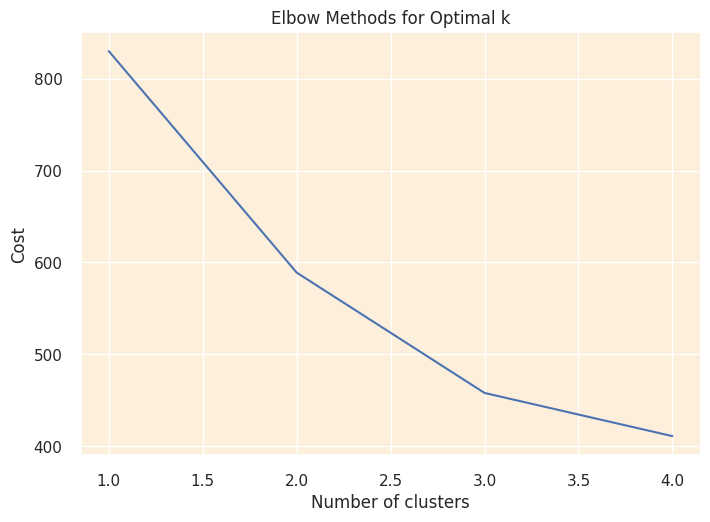

In [672]:


import pandas as pd
from kmodes.kmodes import KModes
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_total is your dataset and kmedo is already fitted
cost = []
# Fit KMedoids model to the data
for num_cluster in range(1,5):
  kmode = KModes(n_clusters= num_cluster, init = 'random', n_init = 5, verbose = 1)
  kmode.fit_predict(df_total)
  cost.append(kmode.cost_)

# Get cluster labels
plt.plot(range(1,5), cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Methods for Optimal k')
plt.show()

we used the k = 3 that's seemly good to handle customer segmentations

In [673]:
kmode = KModes(n_clusters = 3, init = 'random', n_init = 5, verbose = 1)
kmode.fit(df_total)

df_total['KMode_labels'] = kmode.predict(df_total)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 43, cost: 473.0
Run 1, iteration: 2/100, moves: 23, cost: 463.0
Run 1, iteration: 3/100, moves: 0, cost: 463.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 37, cost: 465.0
Run 2, iteration: 2/100, moves: 5, cost: 465.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12, cost: 458.0
Run 3, iteration: 2/100, moves: 2, cost: 458.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 521.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12, cost: 458.0
Run 5, iteration: 2/100, moves: 1, cost: 458.0
Best run was number 3


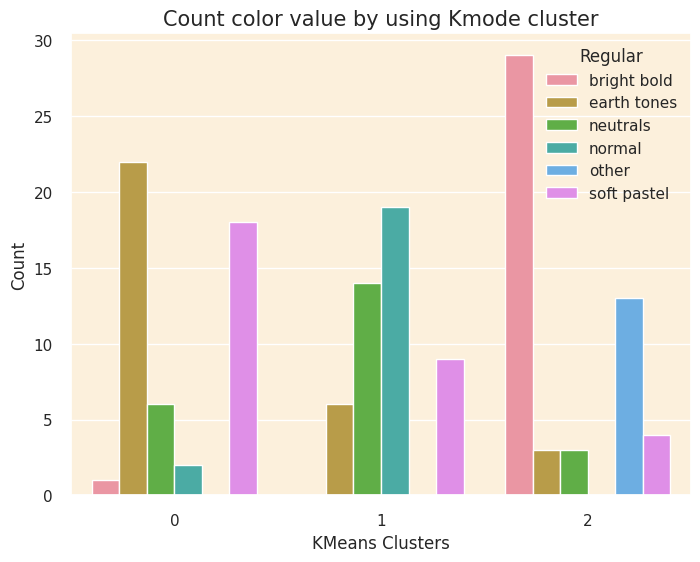

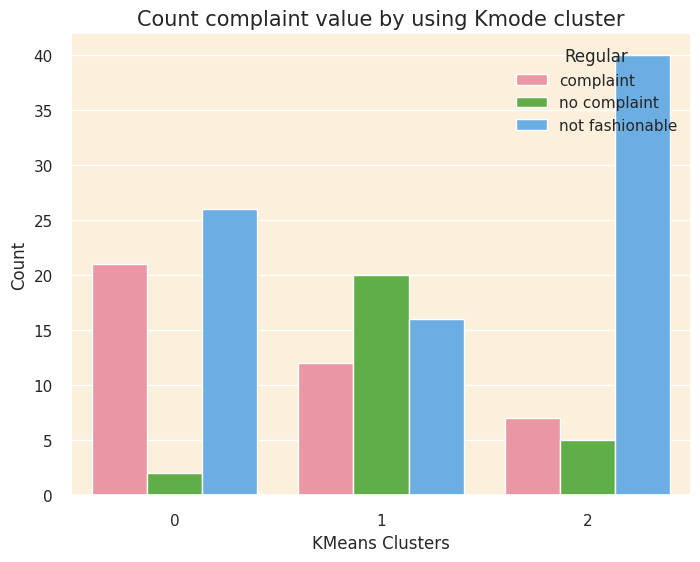

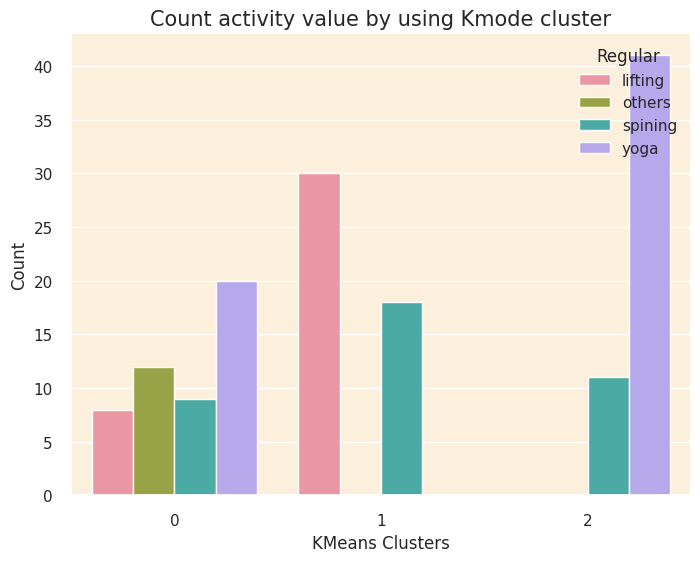

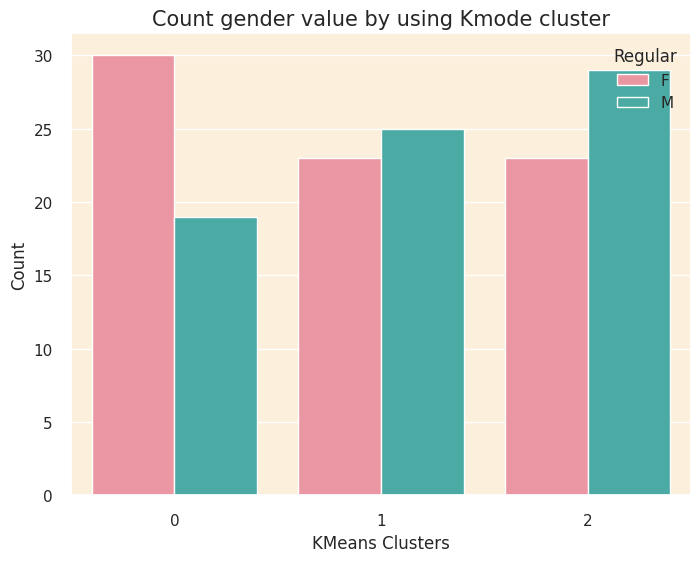

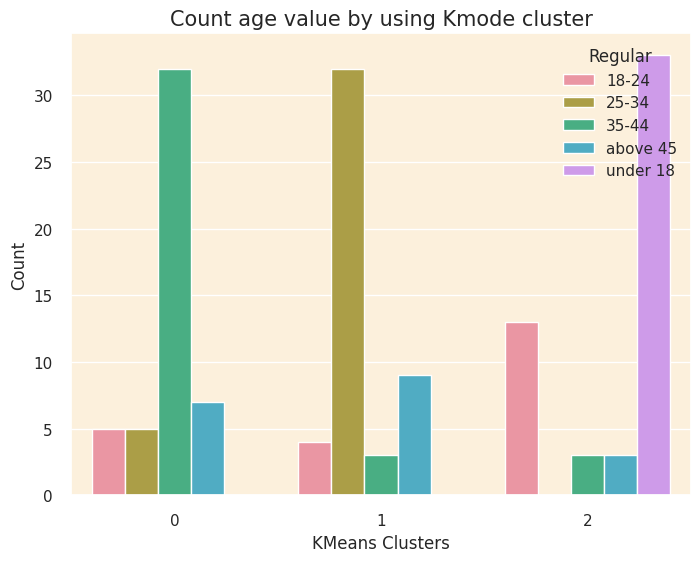

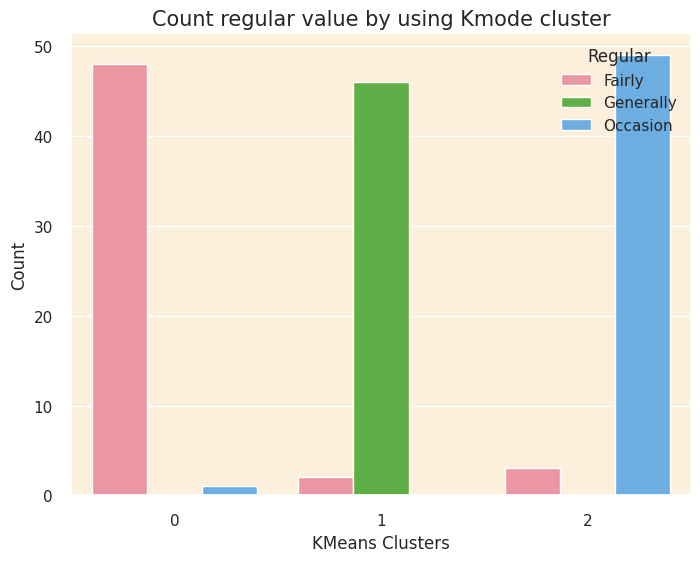

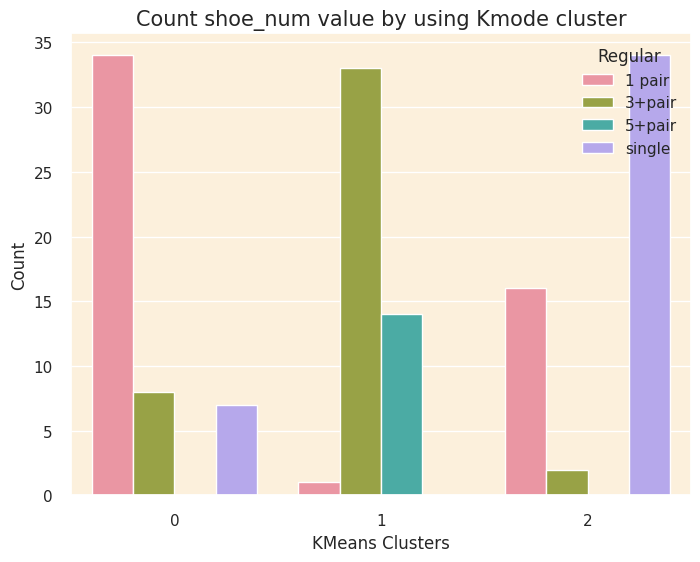

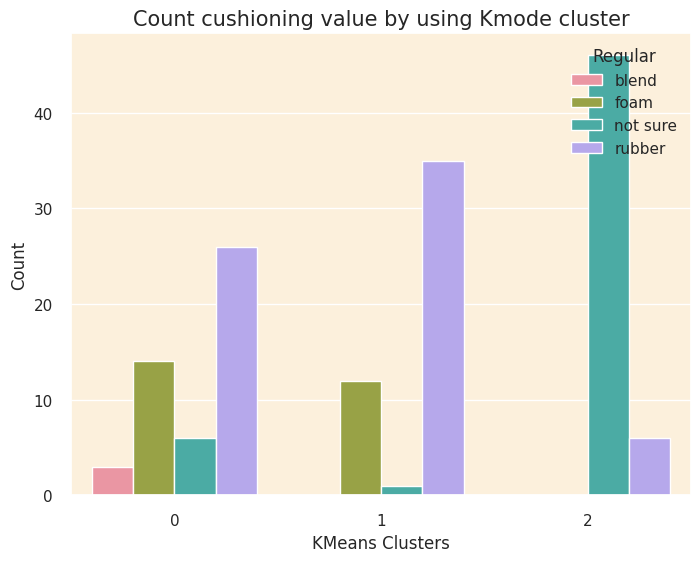

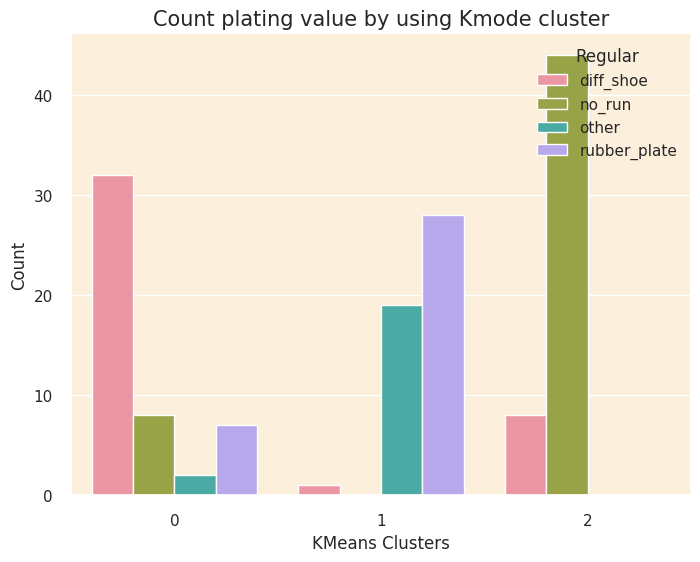

In [616]:
x = 'KMode_labels'
for i in df_total.columns[:-1].to_list():
  k_mean_map(x, i, df_total, f'Count {i} value by using Kmode cluster')

## 6 Intepret result
The 2 Algorithms show three distinctive clusters based on age groups and their preferences.
 + Cluster 0, comprising customers above 35 years old, displays an interest in various activities like yoga, lifting, and others. They favor shoes having earth tones and soft pastel colors , mostly use 'fairly' cushioning, and own 3 to 5 pairs of shoes, leaning towards rubber, foam, and blend cushioning. They also use specific shoes for running.

+ Cluster 1 contains customers under 18 who prefer yoga, find shoes 'not fashionable,' favor bright bold and other colors, occasionally use shoes, typically owning a single pair. They have limited knowledge about cushioning types and don't participate in racing activities.

+ Cluster 2 consists of individuals aged 25 to 34 who favor lifting and spinning, often complaining about shoe fashion and other factors. They prefer soft pastel, normal, and neutral colors, generally use shoes, own one pair for running, and prefer rubber and foam cushioning, favoring rubber plates.

In summary, while the algorithm provides valuable insights into potential clusters based on age and activity preferences, the clusters still seem consits of many factors in each attribute, possibly affecting their clarity

Marketing strategies:
Cluster 1: for the group below 18 and early twentieth:
+  producing the shoe with various bright bold colors with many fashionable designs because they really care about their appearance, the item can able to be mixed matched with other apparels
+ Offering limited edition or exclusive colors and designs to create the sense of uniquenes and exclusivity among this segment
+ Emphasizing the message how the shoes can be used in various occasions and activities, especially for yoga sessions

Cluster 2: for the group aged 25 and 34 years old
+ Offering more fashionable designs and promoting the models that have soft pastel, normal and neutral colors thaat aligns with their color preferences
+ Pressing the shoes that are comfortable for lifting and spinning activities and specically support for these activitives
+ Increasing the producing the shoes that feature rubber plates and foam cushioning for comfort and support once individuals performs some excercise as spinning and exercises.

Cluster 0:  for the group who 's above 35 years old
+ Designing the shoes that can be used in many occasions like yoga, lifting, spinning that can match many activities.
+ Offering the shoes that have earth tones and soft pastel colors in shoe designs.
+ Emphasizing in the marketing stategies that the shoes own fairly cushioning supporting the comfort over various acitivites, especially running and enhancing the perfomance of activities.